In [1]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

# To make this notebook's output stable across runs
np.random.seed(255)

#To ignore future warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
domains = ["motor", "attention", "executive", "sensory", "language", "neglect"]
n_domains = len(domains)

# Import the dataset from longitudinal clustering

In [3]:
NMF = pd.read_csv(r'../Longitudinal/NMF_per_timepoint'+'.csv').drop(columns=['Unnamed: 0'])

#Change label column type for statistics purposes
NMF['Labels'] = NMF['Labels'].astype(str)
NMF["longitudinal_motor_labels"] = NMF["longitudinal_motor_labels"].astype(str)
NMF["time"]= NMF["time"].astype(str)

display(NMF.head())

,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels
0,0.003716,0.194499,0.295743,0.000000,0.288797,0.056766,P001,0,0,1,0
1,0.003425,0.170126,0.328080,0.000000,0.300511,0.047076,P001,0,1,3,0
2,0.003898,0.204180,0.213347,0.010526,0.243593,0.017072,P001,0,2,12,0
3,0.003055,0.177056,0.248852,0.000000,0.267846,0.014714,P001,0,3,52,0
4,0.036073,0.179785,0.332524,0.000000,0.210102,0.037255,P002,0,0,1,0


In [4]:
# Generate a colormap with unique colors for each label
color_labels = NMF['longitudinal_motor_labels'].unique()
col_values = sns.color_palette('Set2')
colormap = dict(zip(color_labels, col_values))
print(colormap)

{'0': (0.4, 0.7607843137254902, 0.6470588235294118), '1': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), '2': (0.5529411764705883, 0.6274509803921569, 0.796078431372549)}


## Exploring longitudinal motor results in terms of cognitive functions

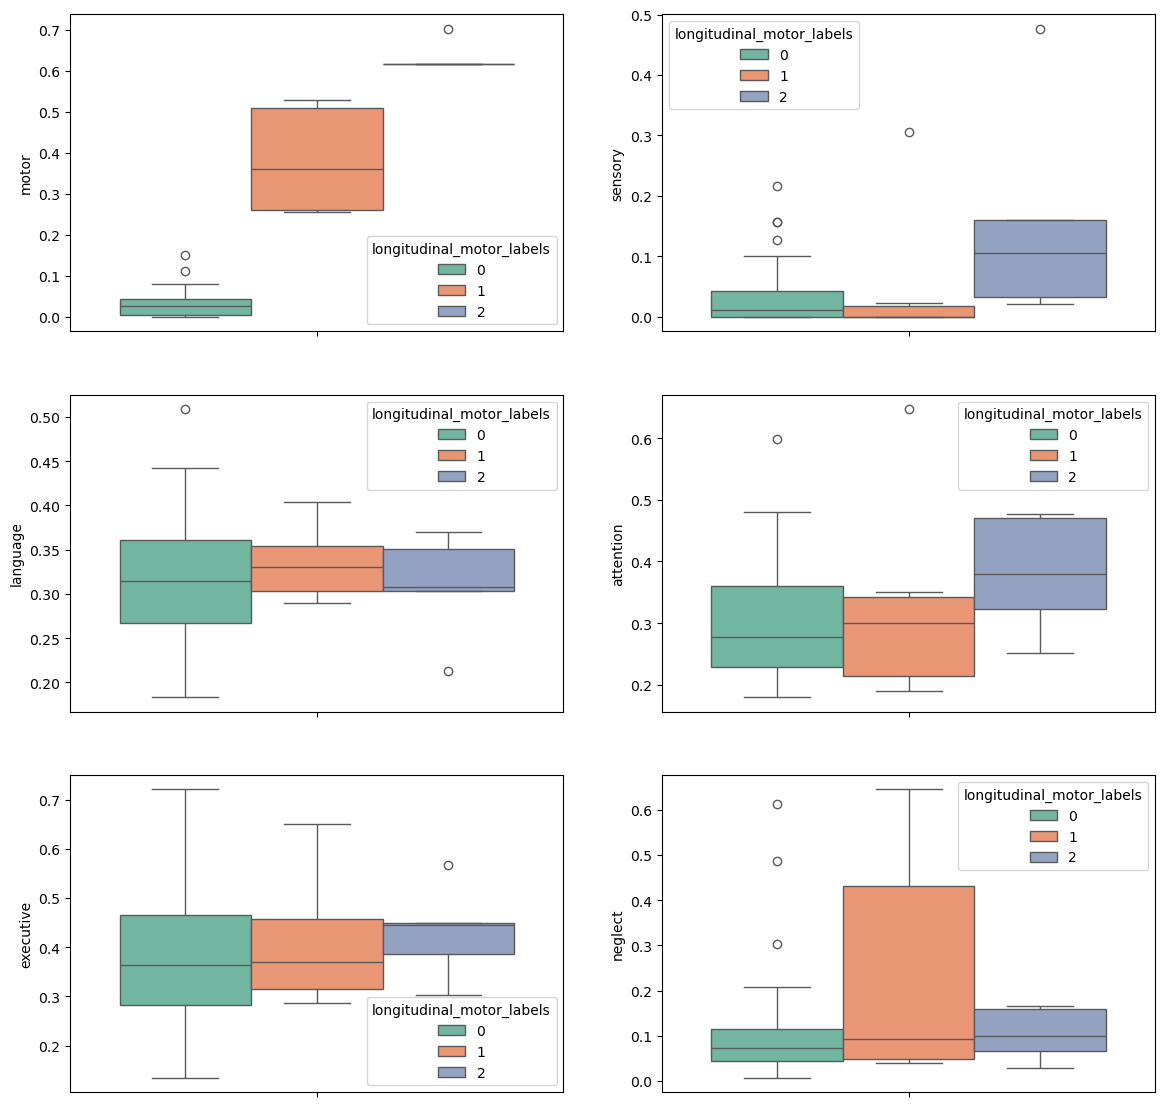

In [5]:
fig, ax = plt.subplots(n_domains//2, n_domains//3, figsize=(14,14))
for i,domain in enumerate(domains):
    sns.boxplot(data=NMF[NMF["time"]=="1"],y=NMF[domain], hue="longitudinal_motor_labels", palette=colormap, ax=ax[i%3, i%2])

## Let's try to classify from acute motor and cognitive impairments to which trends, patients belong to

In [6]:
NMF_1 = NMF[NMF["time"]=="1"]
display(NMF_1)

predictors = NMF_1.drop(columns=["Labels", "time_in_weeks", "time", "longitudinal_motor_labels"]).set_index("Patient")
display(predictors)
y = NMF_1[["longitudinal_motor_labels", "Patient"]].set_index("Patient")
display(y)

,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels
0,0.003716,0.194499,0.295743,0.000000,0.288797,0.056766,P001,0,0,1,0
4,0.036073,0.179785,0.332524,0.000000,0.210102,0.037255,P002,0,0,1,0
7,0.025385,0.260306,0.366695,0.000000,0.305543,0.017137,P003,0,0,1,0
11,0.011965,0.221951,0.386690,0.033708,0.319733,0.126463,P004,0,0,1,0
14,0.014486,0.314425,0.337978,0.000000,0.279560,0.078781,P005,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
192,0.037408,0.414243,0.656113,0.000000,0.413522,0.078716,P077,1,0,1,0
196,0.011417,0.599343,0.720696,0.126761,0.410142,0.613028,P078,1,0,1,0
199,0.005169,0.277696,0.242828,0.000000,0.305543,0.089160,P080,0,0,1,0
202,0.078167,0.236123,0.272756,0.000000,0.260338,0.084282,P081,0,0,1,0


,motor,attention,executive,sensory,language,neglect
Patient,,,,,,
P001,0.003716,0.194499,0.295743,0.000000,0.288797,0.056766
P002,0.036073,0.179785,0.332524,0.000000,0.210102,0.037255
P003,0.025385,0.260306,0.366695,0.000000,0.305543,0.017137
P004,0.011965,0.221951,0.386690,0.033708,0.319733,0.126463
P005,0.014486,0.314425,0.337978,0.000000,0.279560,0.078781
...,...,...,...,...,...,...
P077,0.037408,0.414243,0.656113,0.000000,0.413522,0.078716
P078,0.011417,0.599343,0.720696,0.126761,0.410142,0.613028
P080,0.005169,0.277696,0.242828,0.000000,0.305543,0.089160


,longitudinal_motor_labels
Patient,
P001,0
P002,0
P003,0
P004,0
P005,0
...,...
P077,0
P078,0
P080,0


### About predictors : Acute motor and cognitive scores without any processing

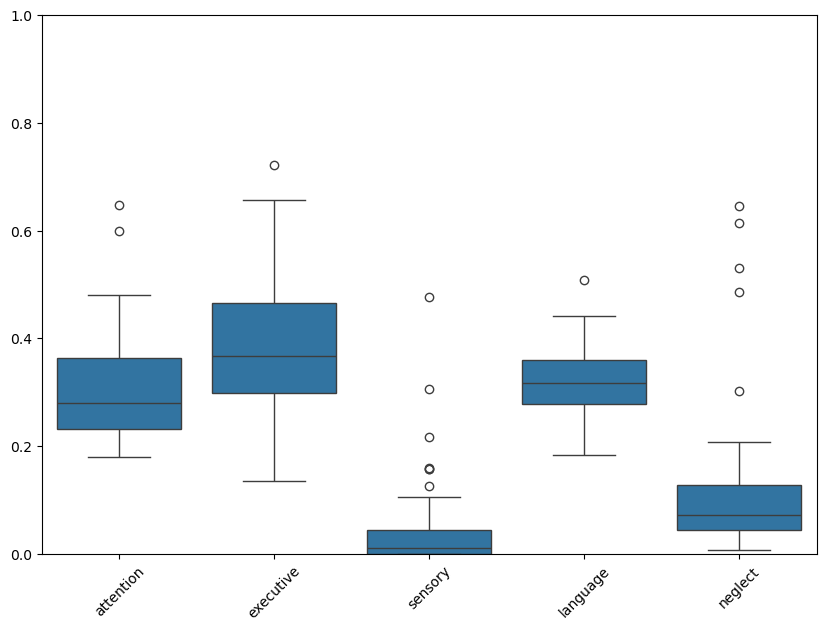

In [7]:
domain = domains[1:]
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=predictors.drop(columns = "motor"), color='#1f77b4', ax=ax)
ax.set_ylim(0, 1)
ax.set_xticklabels(domain)
plt.xticks(rotation=45)
plt.show()

## About the variable of interest

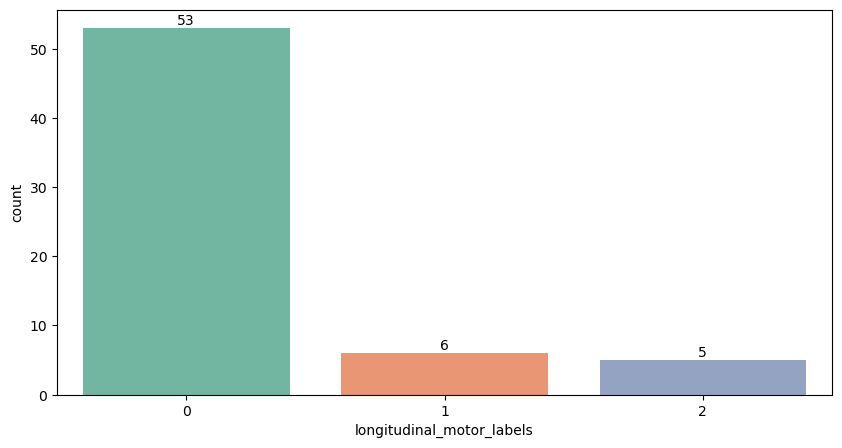

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y, x="longitudinal_motor_labels", palette=colormap, ax=ax)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()

We have a Classification Problem with unbalanced data : if the model predicts 0 every time it will get a good accuracy !! \
First possibility : reduce the amount of label 0 to 7 : actually not necessary

## To get p_values we use the Multinomial logistic regression from the statsmodel library

In [9]:
domains = ["motor", "attention", "executive", "sensory", "language", "neglect"]
NMF_1_classification = NMF_1
NMF_classification = NMF

# Select independent and dependent variables
x = NMF_1_classification[["motor", "attention"]]
y = NMF_1_classification["longitudinal_motor_labels"]

# Select the model
mod = sm.MNLogit(y,x)

# Fits the model 
np.random.seed(2)
results = mod.fit(maxiter=26)

# Print thes summary output provided by the library.
print(results.summary())
print(results.resid_misclassified)


         Current function value: 0.095651
         Iterations: 26
                              MNLogit Regression Results                             
Dep. Variable:     longitudinal_motor_labels   No. Observations:                   64
Model:                               MNLogit   Df Residuals:                       60
Method:                                  MLE   Df Model:                            2
Date:                       Thu, 04 Jul 2024   Pseudo R-squ.:                  0.8343
Time:                               23:09:33   Log-Likelihood:                -6.1216
converged:                             False   LL-Null:                       -36.945
Covariance Type:                   nonrobust   LLR p-value:                 4.106e-14
longitudinal_motor_labels=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
motor                         261.0165   1.07e+04     

In [10]:
predict_labels = results.predict(x).idxmax(axis=1)
NMF_1_classification["predicted_labels"] = predict_labels.astype(str)
display(NMF_1)
display(NMF_1_classification)


NMF_classification["predicted_labels"] = NMF_classification.apply(lambda x: NMF_1_classification[NMF_1_classification["Patient"]==x["Patient"]]["predicted_labels"].values[0] if any(NMF_1_classification["Patient"]==x["Patient"]) else np.nan, axis=1)
display(NMF_classification)

,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
0,0.003716,0.194499,0.295743,0.000000,0.288797,0.056766,P001,0,0,1,0,0
4,0.036073,0.179785,0.332524,0.000000,0.210102,0.037255,P002,0,0,1,0,0
7,0.025385,0.260306,0.366695,0.000000,0.305543,0.017137,P003,0,0,1,0,0
11,0.011965,0.221951,0.386690,0.033708,0.319733,0.126463,P004,0,0,1,0,0
14,0.014486,0.314425,0.337978,0.000000,0.279560,0.078781,P005,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.037408,0.414243,0.656113,0.000000,0.413522,0.078716,P077,1,0,1,0,0
196,0.011417,0.599343,0.720696,0.126761,0.410142,0.613028,P078,1,0,1,0,0
199,0.005169,0.277696,0.242828,0.000000,0.305543,0.089160,P080,0,0,1,0,0
202,0.078167,0.236123,0.272756,0.000000,0.260338,0.084282,P081,0,0,1,0,0


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
0,0.003716,0.194499,0.295743,0.000000,0.288797,0.056766,P001,0,0,1,0,0
4,0.036073,0.179785,0.332524,0.000000,0.210102,0.037255,P002,0,0,1,0,0
7,0.025385,0.260306,0.366695,0.000000,0.305543,0.017137,P003,0,0,1,0,0
11,0.011965,0.221951,0.386690,0.033708,0.319733,0.126463,P004,0,0,1,0,0
14,0.014486,0.314425,0.337978,0.000000,0.279560,0.078781,P005,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.037408,0.414243,0.656113,0.000000,0.413522,0.078716,P077,1,0,1,0,0
196,0.011417,0.599343,0.720696,0.126761,0.410142,0.613028,P078,1,0,1,0,0
199,0.005169,0.277696,0.242828,0.000000,0.305543,0.089160,P080,0,0,1,0,0
202,0.078167,0.236123,0.272756,0.000000,0.260338,0.084282,P081,0,0,1,0,0


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
0,0.003716,0.194499,0.295743,0.000000,0.288797,0.056766,P001,0,0,1,0,0
1,0.003425,0.170126,0.328080,0.000000,0.300511,0.047076,P001,0,1,3,0,0
2,0.003898,0.204180,0.213347,0.010526,0.243593,0.017072,P001,0,2,12,0,0
3,0.003055,0.177056,0.248852,0.000000,0.267846,0.014714,P001,0,3,52,0,0
4,0.036073,0.179785,0.332524,0.000000,0.210102,0.037255,P002,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.047187,0.481552,0.412853,0.000000,0.352398,0.132609,P079,1,1,3,0,NaN
217,0.033269,0.396613,0.435969,0.000000,0.210928,0.148478,P079,1,2,12,0,NaN
218,0.031642,0.429661,0.407130,0.000000,0.339859,0.088666,P079,1,3,52,0,NaN
219,0.085931,0.333692,0.386517,0.014127,0.236911,0.038064,P052,0,2,12,0,NaN


In [11]:
print("misclassified patients:")
display(NMF_1_classification[NMF_1_classification["predicted_labels"] != NMF_1_classification["longitudinal_motor_labels"]])

misclassified patients:


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
178,0.529577,0.189729,0.286234,0.000000,0.296305,0.045249,P073,2,0,1,1,2
181,0.616390,0.469939,0.449094,0.476923,0.350747,0.158380,P074,3,0,1,2,1


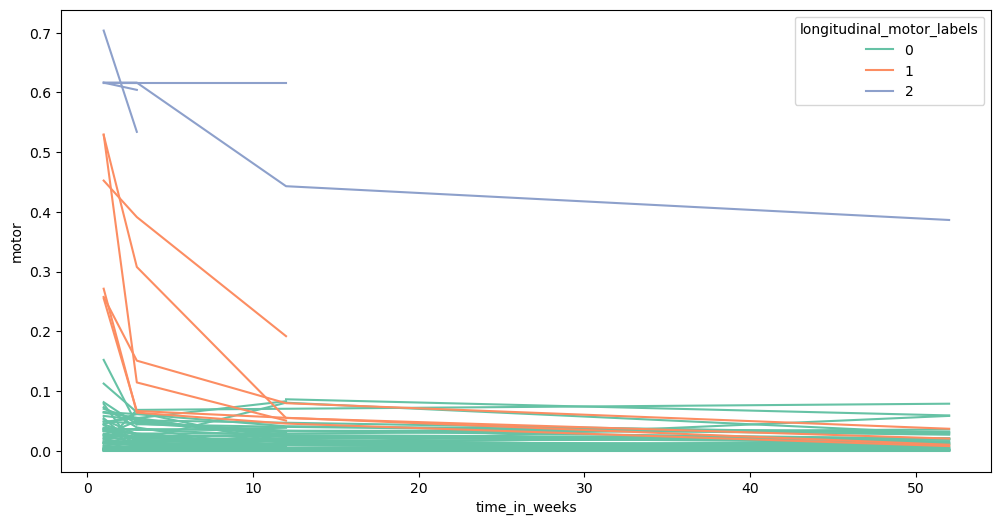

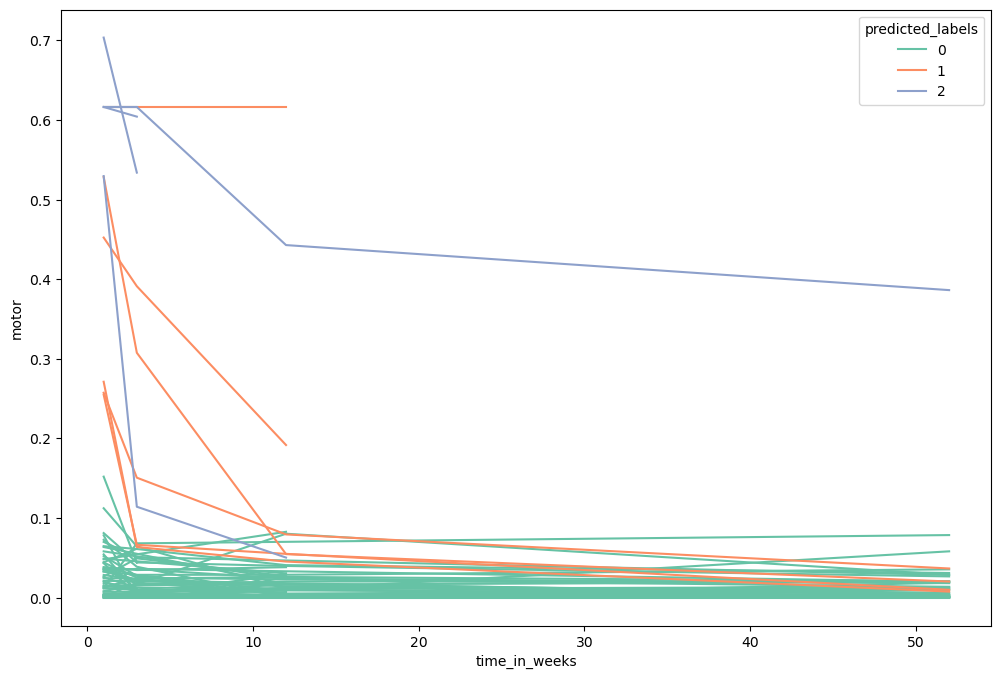

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=NMF_classification, x="time_in_weeks", y="motor", hue="longitudinal_motor_labels", palette=colormap,  estimator =None, units="Patient")
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=NMF_classification, x="time_in_weeks", y="motor", hue="predicted_labels", palette=colormap, estimator =None, units="Patient")
plt.show()

# If we remove neglect patients as in regression

In [13]:
neglect_patients = ["P055", "P048"]
NMF_1_classification2 = NMF_1[~NMF_1["Patient"].isin(neglect_patients)]
NMF_classification2 = NMF[~NMF["Patient"].isin(neglect_patients)]

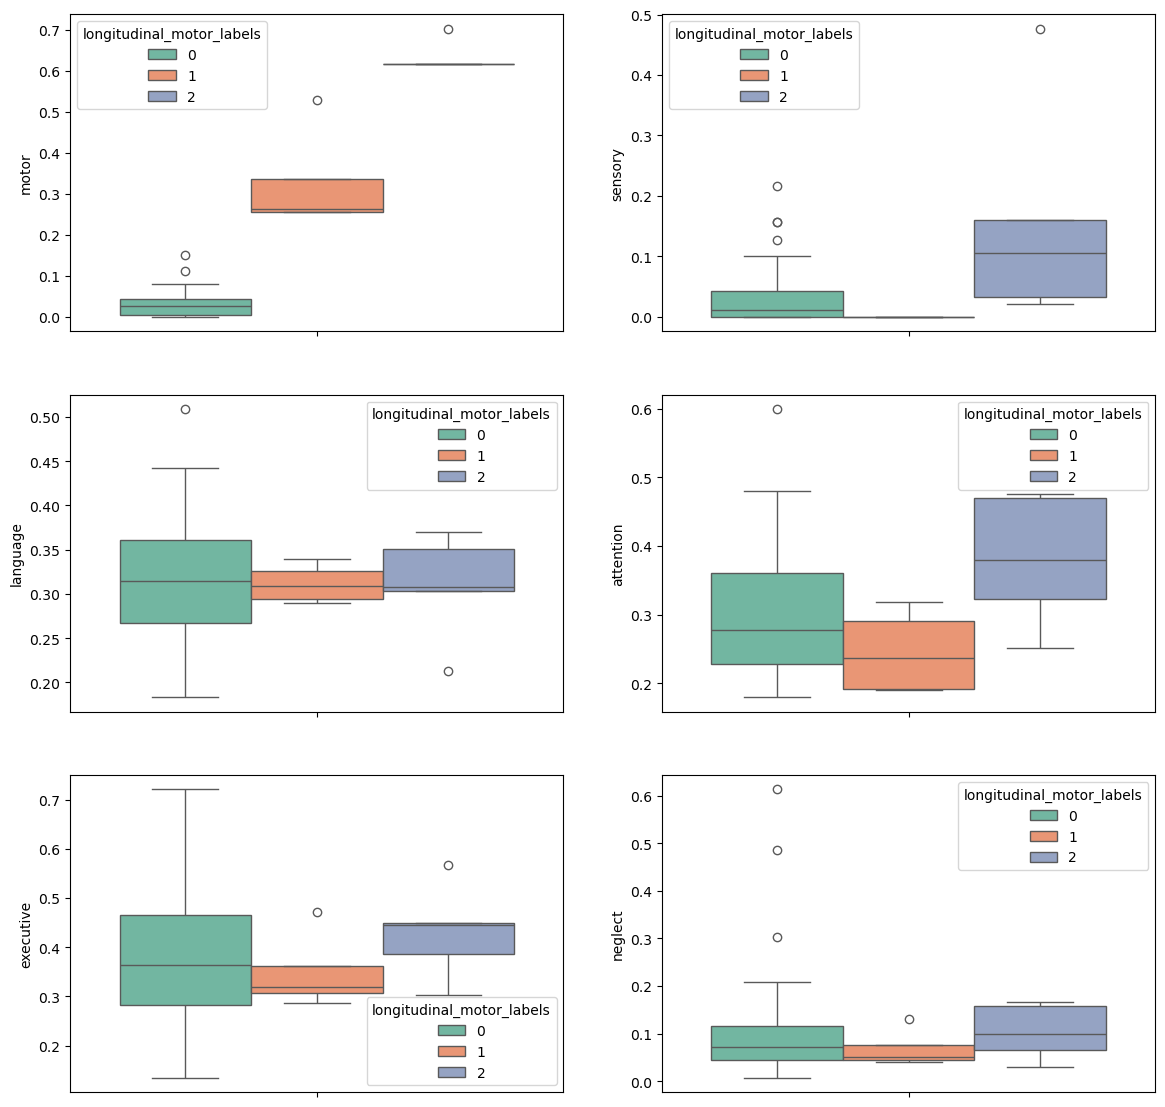

In [14]:
fig, ax = plt.subplots(n_domains//2, n_domains//3, figsize=(14,14))
for i,domain in enumerate(domains):
    sns.boxplot(data=NMF_1_classification2,y=NMF_1_classification2[domain], hue="longitudinal_motor_labels", palette=colormap, ax=ax[i%3, i%2])

Si on retire les patients atteints de neglect, les boxplots ont l'air beaucoup plus significatifs

In [15]:
# Select independent and dependent variables
x2 = NMF_1_classification2[["motor", "attention"]]
y2 = NMF_1_classification2["longitudinal_motor_labels"]

# Select the model
mod2 = sm.MNLogit(y2,x2)

# Fits the model 
np.random.seed(2)
results2 = mod2.fit(maxiter=10)

# Print thes summary output provided by the library.
print(results2.summary())
print(results2.resid_misclassified)

         Current function value: 0.084314
         Iterations: 10
                              MNLogit Regression Results                             
Dep. Variable:     longitudinal_motor_labels   No. Observations:                   62
Model:                               MNLogit   Df Residuals:                       58
Method:                                  MLE   Df Model:                            2
Date:                       Thu, 04 Jul 2024   Pseudo R-squ.:                  0.8359
Time:                               23:09:35   Log-Likelihood:                -5.2274
converged:                             False   LL-Null:                       -31.864
Covariance Type:                   nonrobust   LLR p-value:                 2.702e-12
longitudinal_motor_labels=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
motor                         121.2507    268.660     

In [16]:
predict_labels2 = results2.predict(x2).idxmax(axis=1)
NMF_1_classification2["predicted_labels"] = predict_labels2.astype(str)
NMF_classification2["predicted_labels"] = NMF_classification2.apply(lambda x: NMF_1_classification2[NMF_1_classification2["Patient"]==x["Patient"]]["predicted_labels"].values[0] if any(NMF_1_classification2["Patient"]==x["Patient"]) else np.nan, axis=1)

In [17]:
print("misclassified patients:")
display(NMF_1_classification2[NMF_1_classification2["predicted_labels"] != NMF_1_classification2["longitudinal_motor_labels"]])

misclassified patients:


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
30,0.254974,0.192438,0.312987,0.0,0.289623,0.056782,P011,0,0,1,1,2
178,0.529577,0.189729,0.286234,0.0,0.296305,0.045249,P073,2,0,1,1,2


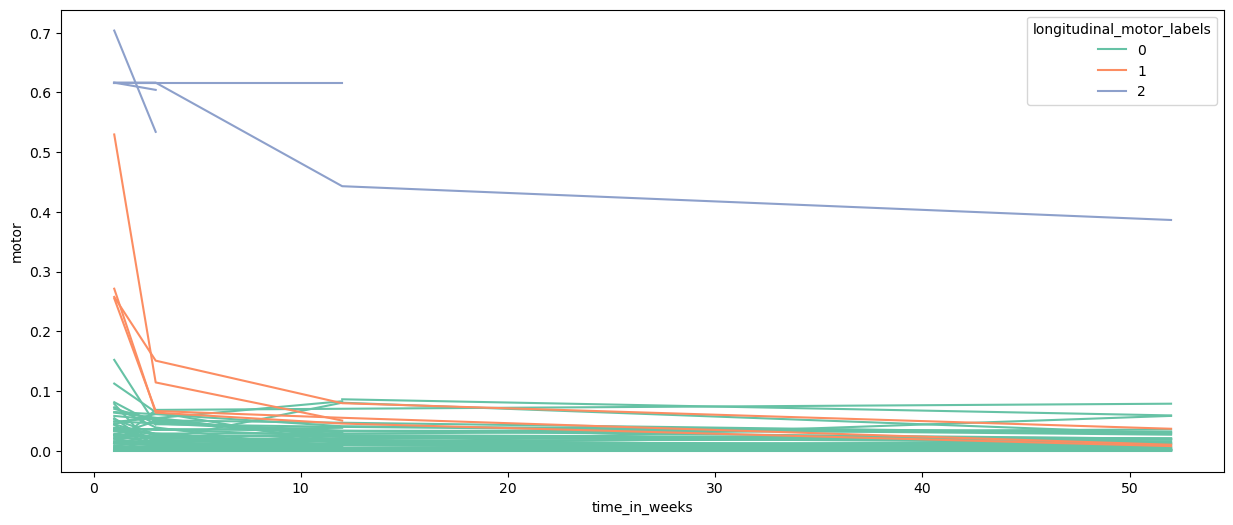

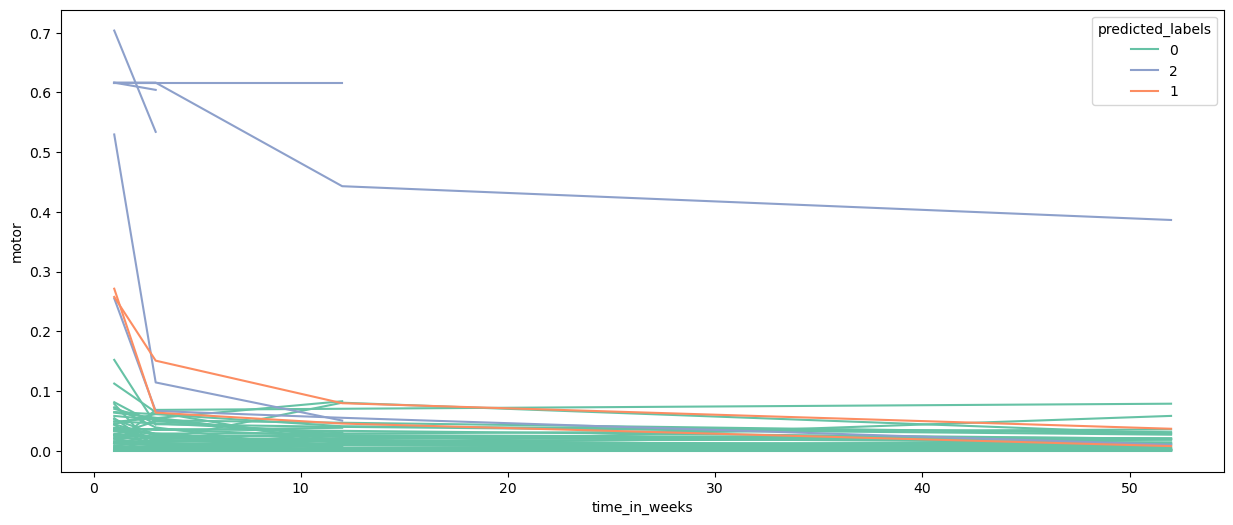

In [18]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification2, x="time_in_weeks", y="motor", hue="longitudinal_motor_labels", palette=colormap,  estimator =None, units="Patient")
plt.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification2, x="time_in_weeks", y="motor", hue="predicted_labels", palette=colormap, estimator =None, units="Patient")
plt.show()

Not better, the problem was not neglect or the motor domain has a too strong impact

## Can we recover labels 1 and 2 ?

In [19]:
#Removing longitudinal_motor_labels equal to 0
NMF_1_classification3 = NMF_1_classification[NMF_1_classification["longitudinal_motor_labels"] != "0"]
NMF_classification3 = NMF_classification[NMF_classification["longitudinal_motor_labels"] != "0"]
NMF_1_classification3.drop(columns=["predicted_labels"], inplace=True)
NMF_classification3.drop(columns=["predicted_labels"], inplace=True)

display(NMF_1_classification3)

,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels
30,0.254974,0.192438,0.312987,0.000000,0.289623,0.056782,P011,0,0,1,1
57,0.616390,0.250894,0.303605,0.032258,0.308019,0.098964,P019,2,0,1,2
73,0.271176,0.281245,0.324851,0.000000,0.339033,0.130089,P027,2,0,1,1
93,0.616390,0.379135,0.386879,0.105466,0.302988,0.065383,P035,2,0,1,2
102,0.257391,0.317979,0.471870,0.000000,0.322288,0.039694,P038,2,0,1,1
131,0.452340,0.349944,0.416603,0.022727,0.359985,0.530817,P048,2,0,1,1
139,0.528425,0.647255,0.650434,0.305556,0.403887,0.644716,P055,3,0,1,1
143,0.703592,0.476206,0.566184,0.159634,0.369471,0.166058,P056,3,0,1,2
158,0.616390,0.323320,0.444584,0.021277,0.212579,0.029364,P063,2,0,1,2
178,0.529577,0.189729,0.286234,0.000000,0.296305,0.045249,P073,2,0,1,1


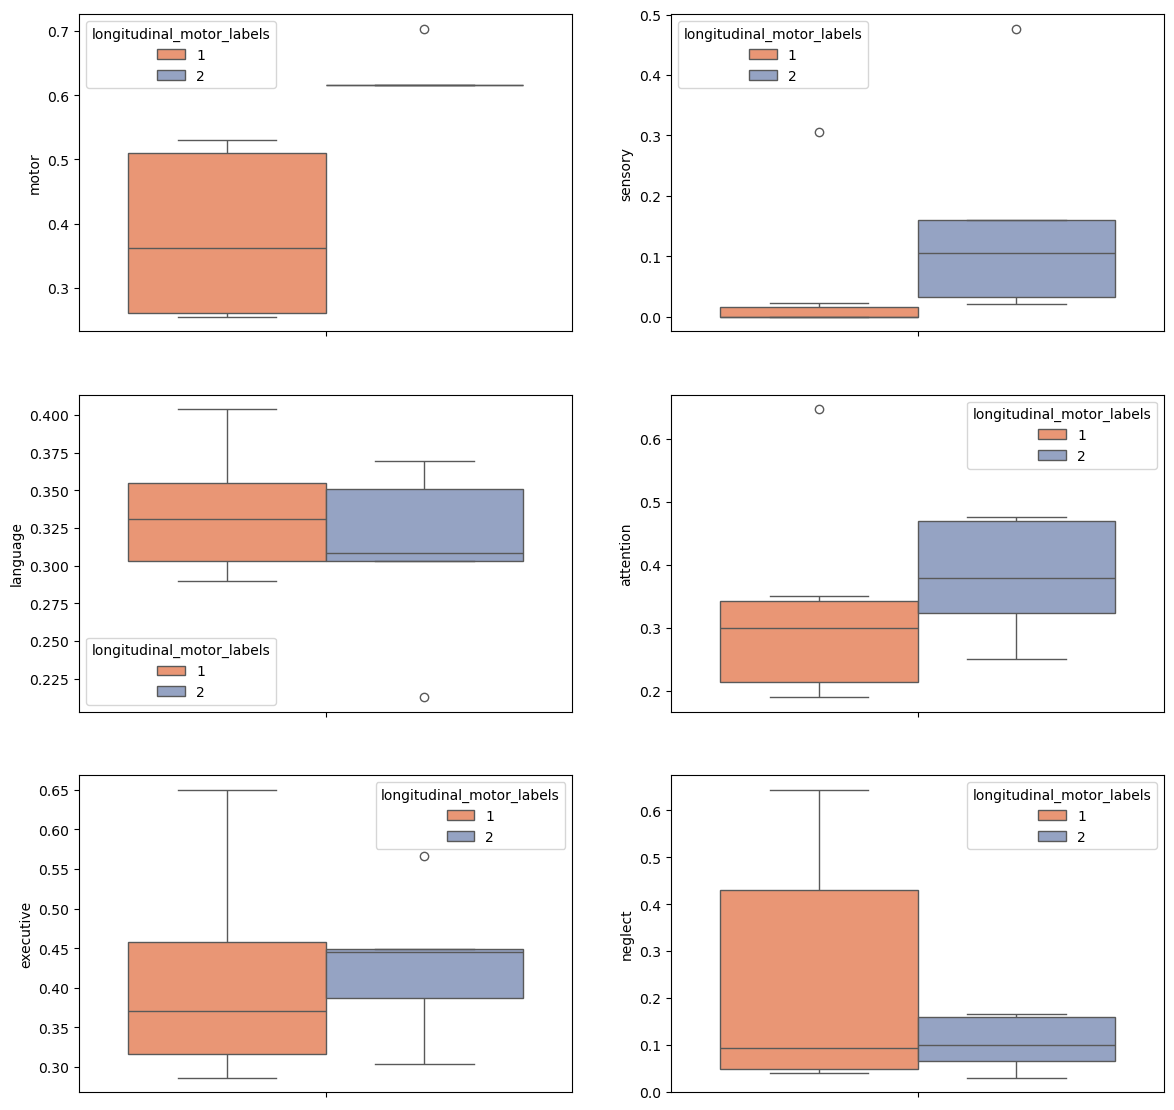

In [20]:
fig, ax = plt.subplots(n_domains//2, n_domains//3, figsize=(14,14))
for i,domain in enumerate(domains):
    sns.boxplot(data=NMF_1_classification3,y=NMF_1_classification3[domain], hue="longitudinal_motor_labels", palette=colormap, ax=ax[i%3, i%2])

In [21]:
# Select independent and dependent variables
x3 = NMF_1_classification3[["language", "motor"]]
y3 = NMF_1_classification3["longitudinal_motor_labels"].astype(int)

# Select the model
y3 = y3.replace(2, 0)
mod3 = sm.Logit(np.asarray(y3),np.asarray(x3))

# Fits the model 
np.random.seed(2)
results3 = mod3.fit(maxiter=20)

# Print thes summary output provided by the library.
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.157057
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   11
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                  0.7721
Time:                        23:09:37   Log-Likelihood:                -1.7276
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                 0.0006240
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.1072    105.089      0.819      0.413    -119.863     292.078
x2           -49.2837     58

In [22]:
predict_probas = results3.predict(np.asarray(x3))
predict_labels3 = (predict_probas > 0.5).astype(int)
print(predict_labels3)
NMF_1_classification3["predicted_labels"] = predict_labels3.astype(str)
NMF_1_classification3["predicted_labels"].replace({"0": "2", "1": "1"}, inplace=True)
display(NMF_1_classification3)

NMF_classification3["predicted_labels"] = NMF_classification3.apply(lambda x: NMF_1_classification3[NMF_1_classification3["Patient"]==x["Patient"]]["predicted_labels"].values[0] if any(NMF_1_classification3["Patient"]==x["Patient"]) else np.nan, axis=1)

[1 0 1 0 1 1 1 0 0 0 0]


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
30,0.254974,0.192438,0.312987,0.000000,0.289623,0.056782,P011,0,0,1,1,1
57,0.616390,0.250894,0.303605,0.032258,0.308019,0.098964,P019,2,0,1,2,2
73,0.271176,0.281245,0.324851,0.000000,0.339033,0.130089,P027,2,0,1,1,1
93,0.616390,0.379135,0.386879,0.105466,0.302988,0.065383,P035,2,0,1,2,2
102,0.257391,0.317979,0.471870,0.000000,0.322288,0.039694,P038,2,0,1,1,1
131,0.452340,0.349944,0.416603,0.022727,0.359985,0.530817,P048,2,0,1,1,1
139,0.528425,0.647255,0.650434,0.305556,0.403887,0.644716,P055,3,0,1,1,1
143,0.703592,0.476206,0.566184,0.159634,0.369471,0.166058,P056,3,0,1,2,2
158,0.616390,0.323320,0.444584,0.021277,0.212579,0.029364,P063,2,0,1,2,2
178,0.529577,0.189729,0.286234,0.000000,0.296305,0.045249,P073,2,0,1,1,2


In [23]:
print("misclassified patients:")
display(NMF_1_classification3[NMF_1_classification3["predicted_labels"] != NMF_1_classification3["longitudinal_motor_labels"]])

misclassified patients:


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
178,0.529577,0.189729,0.286234,0.0,0.296305,0.045249,P073,2,0,1,1,2


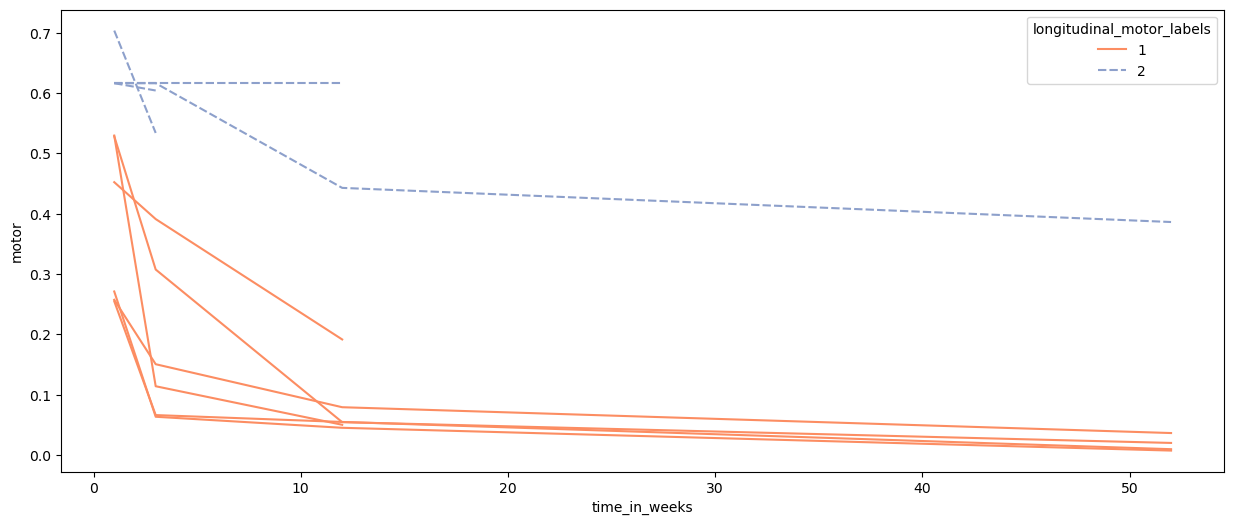

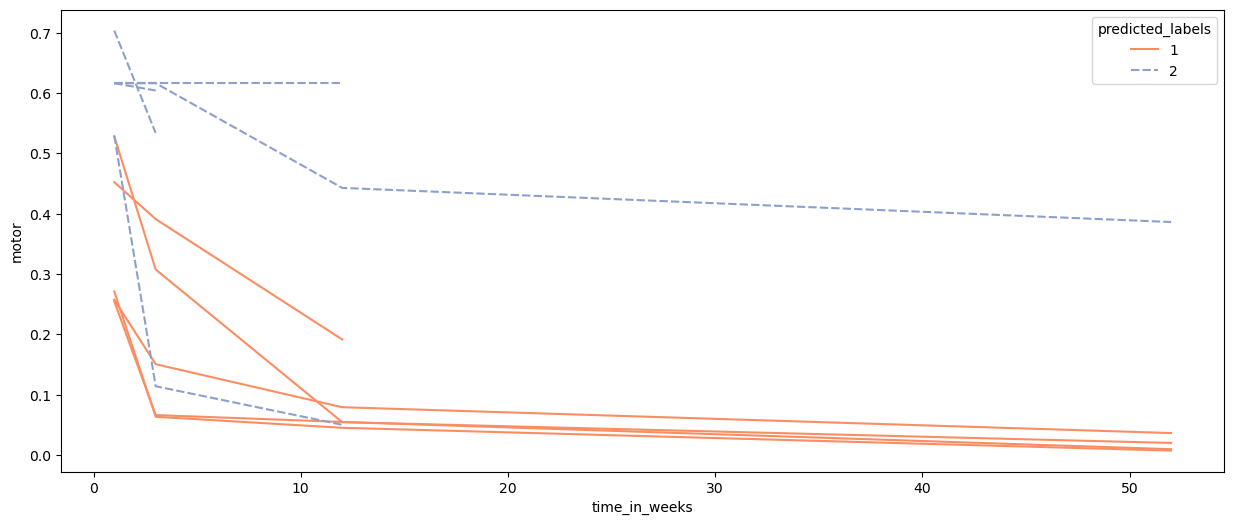

In [24]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification3, x="time_in_weeks", y="motor", hue="longitudinal_motor_labels", palette=colormap,  estimator =None, units="Patient", style="longitudinal_motor_labels")
plt.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification3, x="time_in_weeks", y="motor", hue="predicted_labels", palette=colormap, estimator =None, units="Patient", style="predicted_labels")
plt.show()

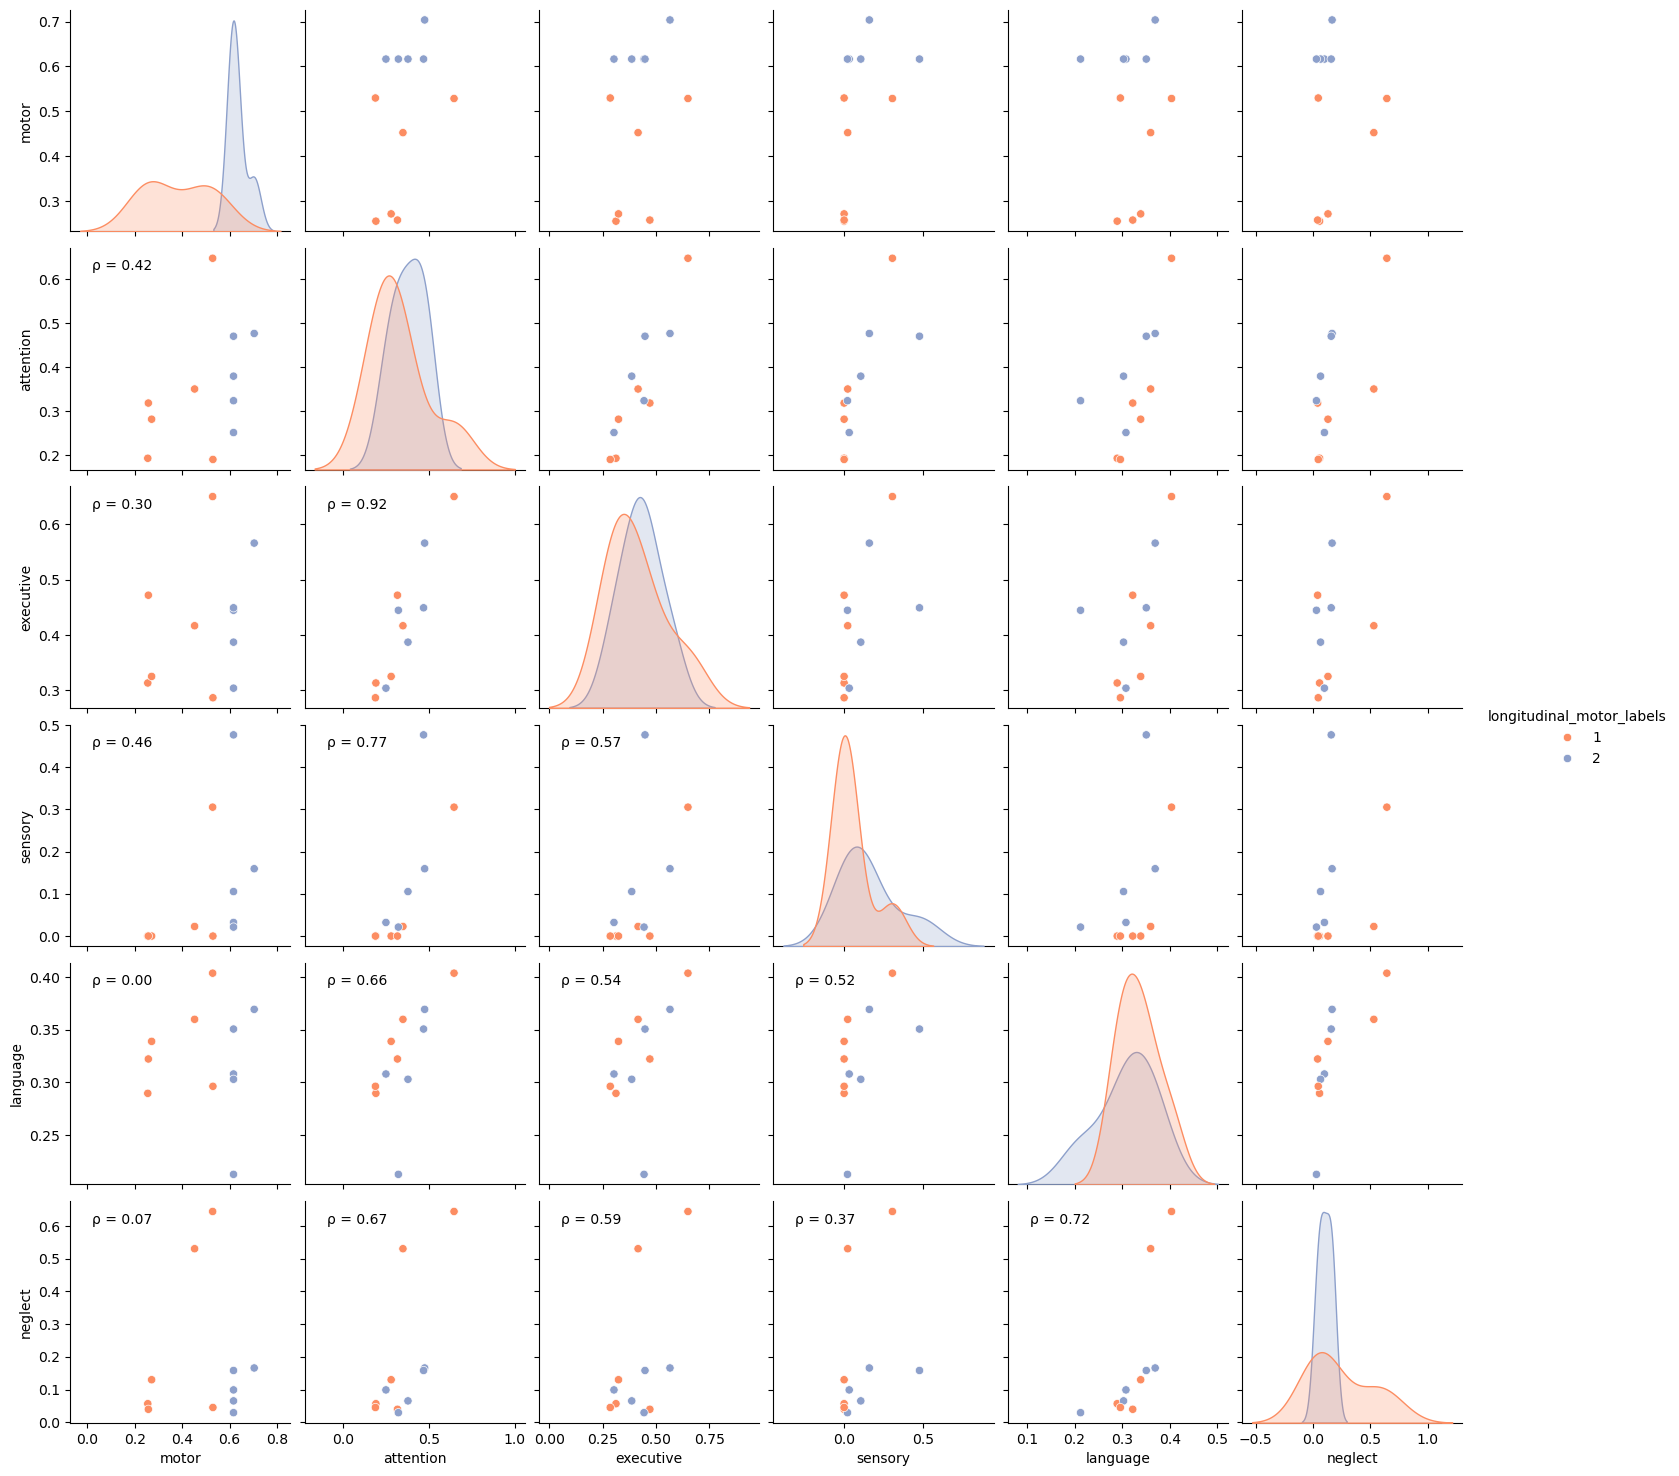

In [25]:

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

def compute_corr_matrix(data, domains):
    corr_matrix = data[domains].corr()
    return corr_matrix

# Compute the correlation matrix
corr_matrix = compute_corr_matrix(NMF_1_classification3, domains)

# Create pairplot with hue for coloring
g = sns.pairplot(NMF_1_classification3[domains + ["longitudinal_motor_labels"]], hue="longitudinal_motor_labels", palette=colormap)

# Apply the correlation annotations to the lower triangle plots
for i, j in zip(*np.tril_indices_from(corr_matrix, -1)):
    g.axes[i, j].annotate(f'ρ = {corr_matrix.iloc[i, j]:.2f}', xy=(.1, .9), xycoords='axes fraction')


P063 non présent dans la regression

Le modèle doit simplement capturer la correlation entre les déficits attentionnels et moteurs, ces deux domaines étant très corrélés dans la phase acute

## If we change the label of P056

In [26]:
NMF_1_classification4 = NMF_1_classification3.drop(columns=["predicted_labels"])
NMF_classification4 = NMF_classification3.drop(columns=["predicted_labels"])
NMF_1_classification4.loc[NMF_1_classification4['Patient'] == 'P056', 'longitudinal_motor_labels'] = '1'
NMF_classification4.loc[NMF_classification4['Patient'] == 'P056', 'longitudinal_motor_labels'] = '1'"

display(NMF_1_classification4[NMF_1_classification4["Patient"]=="P056"]["longitudinal_motor_labels"])

143    1
Name: longitudinal_motor_labels, dtype: object

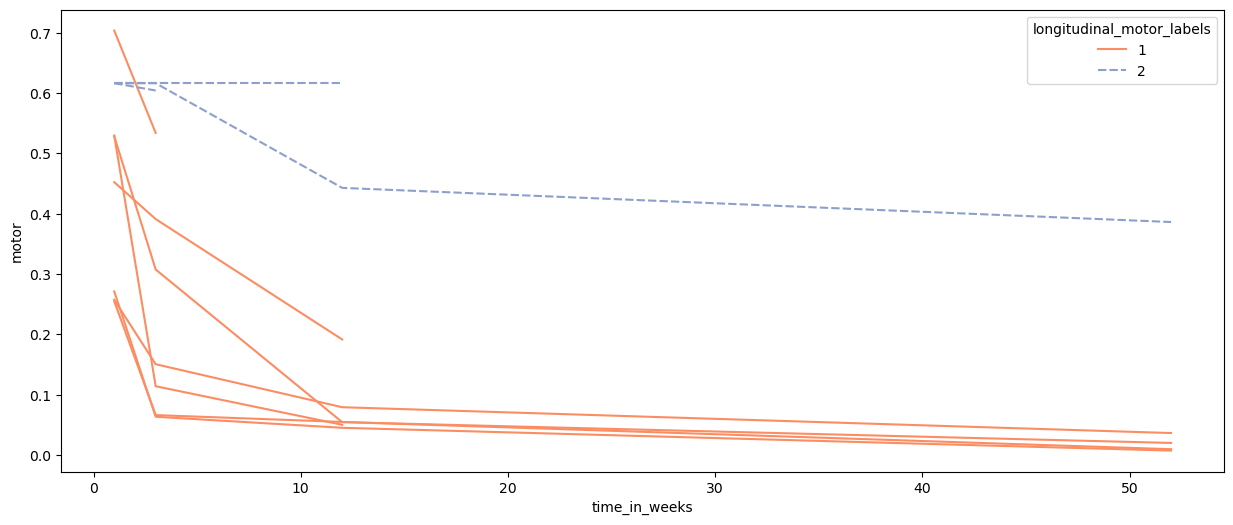

In [27]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification4, x="time_in_weeks", y="motor", hue="longitudinal_motor_labels", palette=colormap,  estimator =None, units="Patient", style="longitudinal_motor_labels")
plt.show()

In [28]:
# Select independent and dependent variables
x4 = NMF_1_classification4[["attention", "neglect", "executive"]]
y4 = NMF_1_classification4["longitudinal_motor_labels"].astype(int)

# Select the model
y4 = y4.replace(2, 0)
mod4 = sm.Logit(np.asarray(y4),np.asarray(x4))

# Fits the model 
np.random.seed(2)
results4 = mod4.fit(maxiter=20)

# Print thes summary output provided by the library.
print(results4.summary())

Optimization terminated successfully.
         Current function value: 0.245602
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   11
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                  0.6253
Time:                        23:09:45   Log-Likelihood:                -2.7016
converged:                       True   LL-Null:                       -7.2103
Covariance Type:            nonrobust   LLR p-value:                   0.01101
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -103.6898     85.745     -1.209      0.227    -271.747      64.367
x2            69.7799     53

In [29]:
predict_probas = results4.predict(np.asarray(x4))
predict_labels4 = (predict_probas > 0.5).astype(int)
print(predict_labels4)
NMF_1_classification4["predicted_labels"] = predict_labels4.astype(str)
NMF_1_classification4["predicted_labels"].replace({"0": "2", "1": "1"}, inplace=True)
display(NMF_1_classification4)

NMF_classification4["predicted_labels"] = NMF_classification4.apply(lambda x: NMF_1_classification4[NMF_1_classification4["Patient"]==x["Patient"]]["predicted_labels"].values[0] if any(NMF_1_classification4["Patient"]==x["Patient"]) else np.nan, axis=1)

[1 1 1 0 1 1 1 1 0 1 0]


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
30,0.254974,0.192438,0.312987,0.000000,0.289623,0.056782,P011,0,0,1,1,1
57,0.616390,0.250894,0.303605,0.032258,0.308019,0.098964,P019,2,0,1,2,1
73,0.271176,0.281245,0.324851,0.000000,0.339033,0.130089,P027,2,0,1,1,1
93,0.616390,0.379135,0.386879,0.105466,0.302988,0.065383,P035,2,0,1,2,2
102,0.257391,0.317979,0.471870,0.000000,0.322288,0.039694,P038,2,0,1,1,1
131,0.452340,0.349944,0.416603,0.022727,0.359985,0.530817,P048,2,0,1,1,1
139,0.528425,0.647255,0.650434,0.305556,0.403887,0.644716,P055,3,0,1,1,1
143,0.703592,0.476206,0.566184,0.159634,0.369471,0.166058,P056,3,0,1,1,1
158,0.616390,0.323320,0.444584,0.021277,0.212579,0.029364,P063,2,0,1,2,2
178,0.529577,0.189729,0.286234,0.000000,0.296305,0.045249,P073,2,0,1,1,1


In [30]:
print("misclassified patients:")
display(NMF_1_classification4[NMF_1_classification4["predicted_labels"] != NMF_1_classification4["longitudinal_motor_labels"]])

misclassified patients:


,motor,attention,executive,sensory,language,neglect,Patient,Labels,time,time_in_weeks,longitudinal_motor_labels,predicted_labels
57,0.61639,0.250894,0.303605,0.032258,0.308019,0.098964,P019,2,0,1,2,1


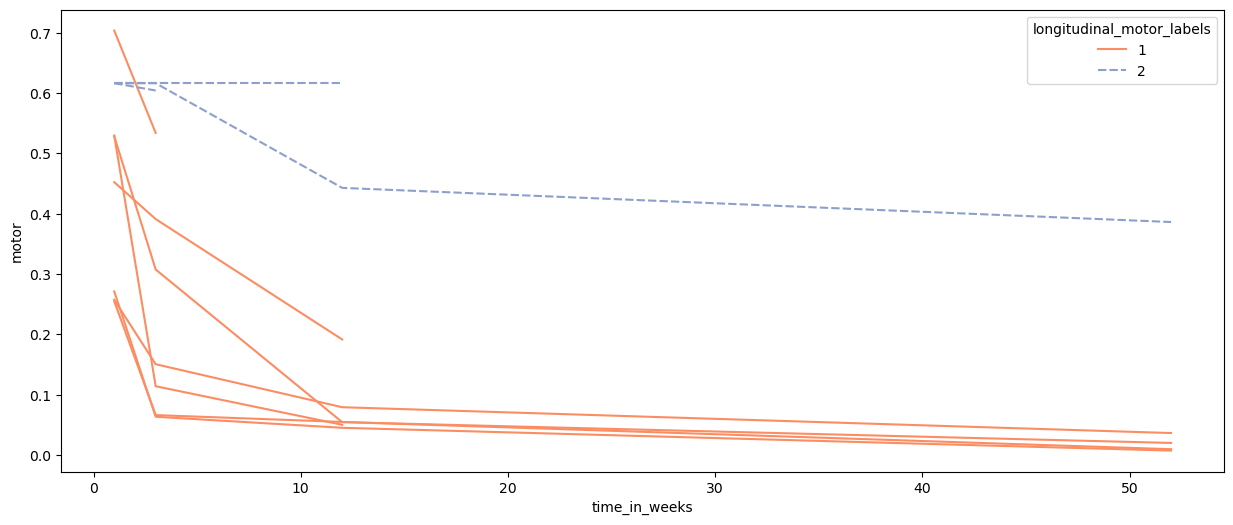

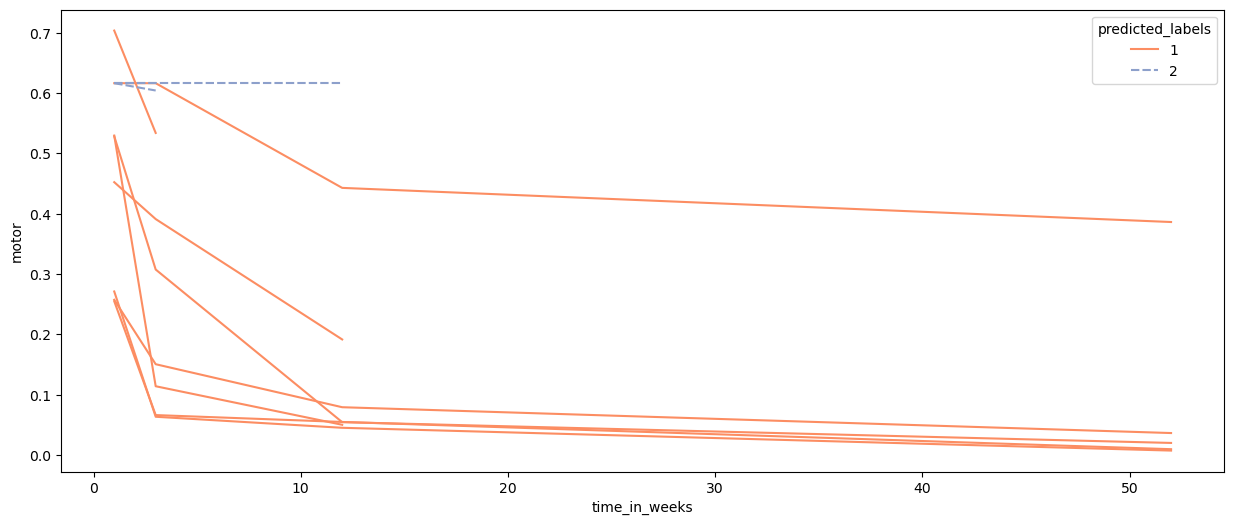

In [31]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification4, x="time_in_weeks", y="motor", hue="longitudinal_motor_labels", palette=colormap,  estimator =None, units="Patient", style="longitudinal_motor_labels")
plt.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=NMF_classification4, x="time_in_weeks", y="motor", hue="predicted_labels", palette=colormap, estimator =None, units="Patient", style="predicted_labels")
plt.show()

P056 is the highest point with neglect after the other ones

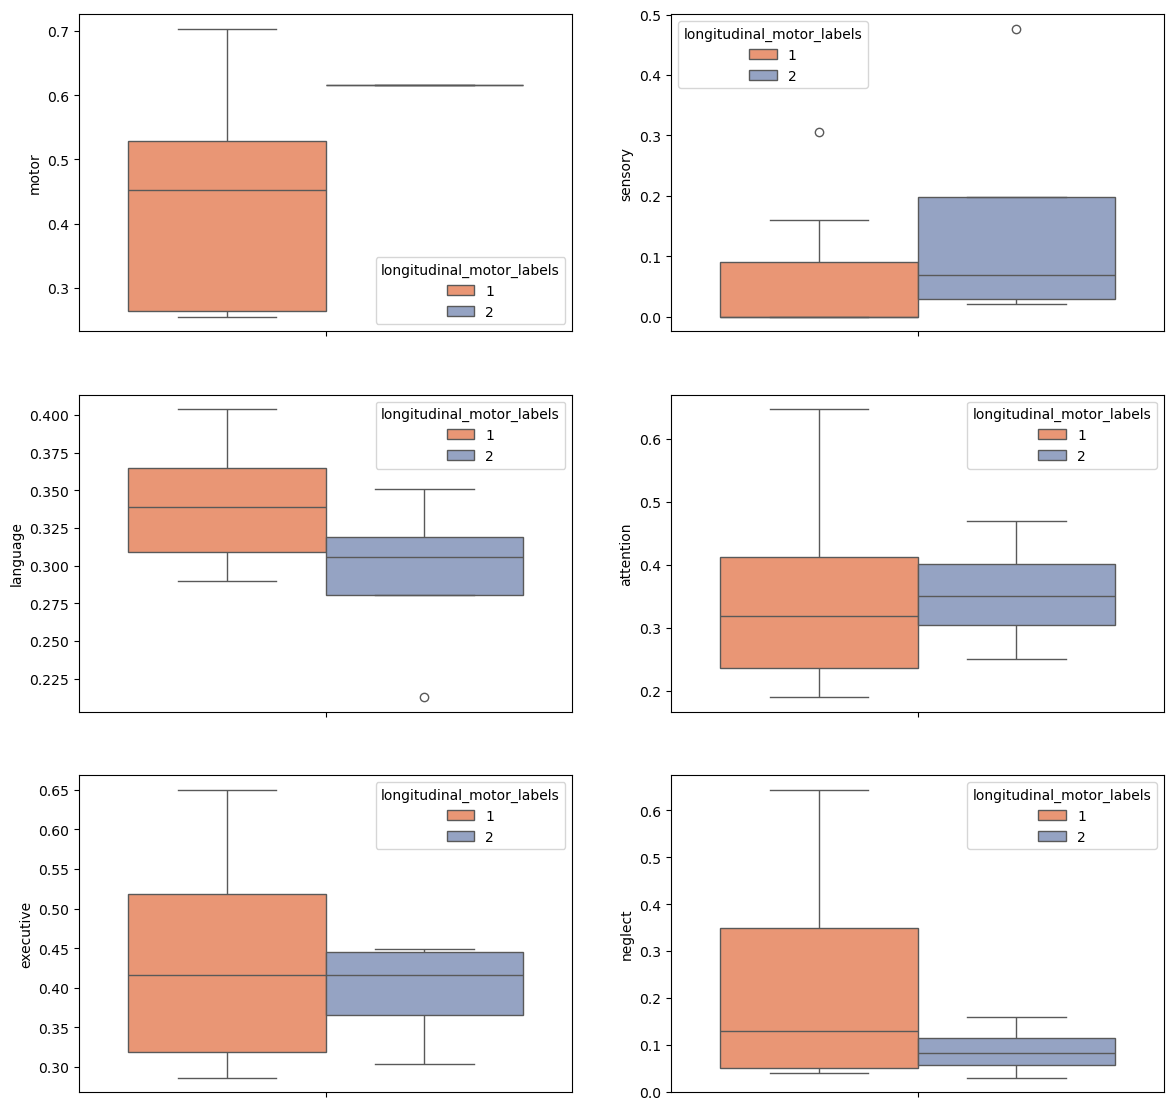

In [32]:
fig, ax = plt.subplots(n_domains//2, n_domains//3, figsize=(14,14))
for i,domain in enumerate(domains):
    sns.boxplot(data=NMF_1_classification4,y=NMF_1_classification4[domain], hue="longitudinal_motor_labels", palette=colormap, ax=ax[i%3, i%2])

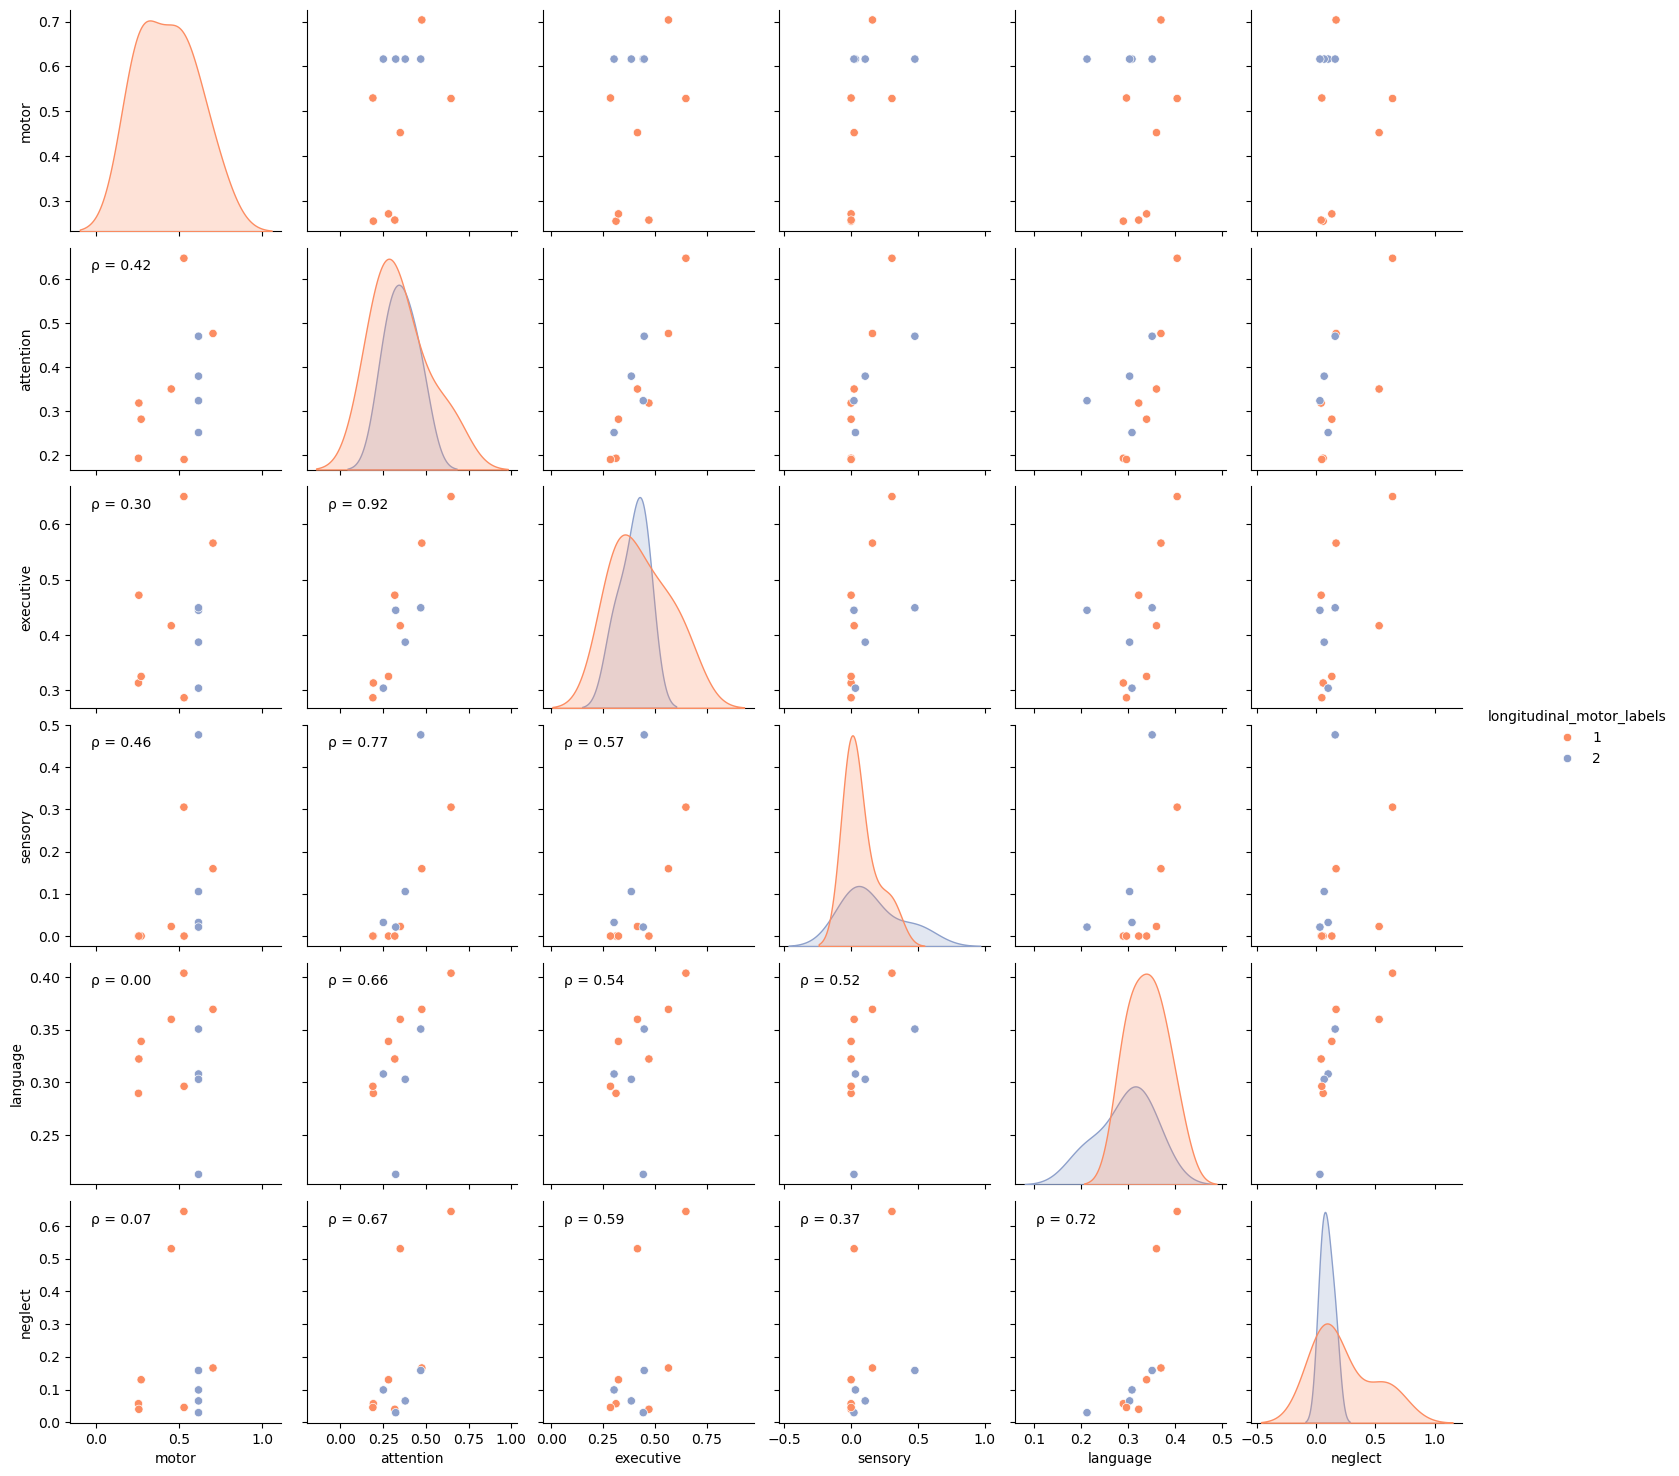

In [33]:
# Compute the correlation matrix
corr_matrix = compute_corr_matrix(NMF_1_classification4, domains)

# Create pairplot with hue for coloring
g = sns.pairplot(NMF_1_classification4[domains + ["longitudinal_motor_labels"]], hue="longitudinal_motor_labels", palette=colormap)

# Apply the correlation annotations to the lower triangle plots
for i, j in zip(*np.tril_indices_from(corr_matrix, -1)):
    g.axes[i, j].annotate(f'ρ = {corr_matrix.iloc[i, j]:.2f}', xy=(.1, .9), xycoords='axes fraction')

plt.show()